In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('max_columns', None)

In [10]:
tomargin=pd.read_csv("data/tabula-turnovers-margin.csv").drop(['G','AVG','AVG.1','Margin'],axis=1).set_index(['Team'])
toratio=pd.read_csv("data/tabula-turnover-ratio.csv").drop(['G','AVG','AVG.1','Ratio','TO'],axis=1).set_index(['Team'])
teamdreb=pd.read_csv("data/tabula-team-def-reb.csv").drop(['G','AVG/G'],axis=1).set_index(['Team'])
teamoreb=pd.read_csv("data/tabula-team-off-reb.csv").drop(['G','AVG/G'],axis=1).set_index(['Team'])
oppreb=pd.read_csv("data/tabula-combined-opp-reb.csv").drop(['G','AVG/G'],axis=1).set_index(['Team'])
teamreb=pd.read_csv("data/tabula-combined-team-reb.csv").drop(['G','AVG/G'],axis=1).set_index(['Team'])
oppft=pd.read_csv("data/tabula-opp-ft.csv").drop(['G','PCT'],axis=1).set_index(['Team'])
teamft=pd.read_csv("data/tabula-team-ft.csv").drop(['G','PCT'],axis=1).set_index(['Team'])
oppfg=pd.read_csv("data/tabula-opp-fg.csv").drop(['G','PCT'],axis=1).set_index(['Team'])
opp3pt=pd.read_csv("data/tabula-opp-3pt.csv").drop(['G','PCT'],axis=1).set_index(['Team'])
oppscoring=pd.read_csv("data/tabula-opp-scoring.csv").drop(['G','W-L','AVG/G'],axis=1).set_index(['Team'])
teamfg=pd.read_csv("data/tabula-team-fg.csv").drop(['G','PCT'],axis=1).set_index(['Team'])
team3pt=pd.read_csv("data/tabula-team-3pt.csv").drop(['G','PCT'],axis=1).set_index(['Team'])
teamscoring=pd.read_csv("data/tabula-team-scoring.csv").drop(['W-L','AVG/G'],axis=1).set_index(['Team'])

# SCRIPT (MUST RUN)

In [11]:
oOREB=pd.DataFrame(data={'oOREB': [0,0,0,0,0,0,0,0]},index=['Yale','Princeton','Harvard','Columbia','Penn','Brown','Cornell','Dartmouth'])
oOREB
# Import necessary packages
from bs4 import BeautifulSoup
import re
import codecs
import os
directory_in_str = r"htmls"
directory = os.fsencode(directory_in_str)
for file in os.listdir(directory):
    filename = r"htmls\\"+os.fsdecode(file)
    f=codecs.open(filename, 'r')
    soup = BeautifulSoup(f, "lxml")
    #print(soup.prettify())# print the parsed data of html
    box = soup.find_all("table", attrs={"class": "sidearm-table highlight-column-hover"})
    table1=box[0]
    oreb1 = table1.tfoot.tr.find("td",attrs={"data-label":"ORB-DRB"}).get_text()
    table2=box[1]
    oreb2 = table2.tfoot.tr.find("td",attrs={"data-label":"ORB-DRB"}).get_text()
    gsdf = soup.find_all("h3", attrs={"class": "sub-heading"})
    use = re.compile("[^\s]+")
    orbonly = re.compile(".+?(?=-)")
    team1 = use.match(gsdf[0].text).group(0)
    team1oreb = int(orbonly.match(oreb1).group(0))
    team2 = use.match(gsdf[1].text).group(0)
    team2oreb = int(orbonly.match(oreb2).group(0))
    oOREB.at[team1,'oOREB']+=team2oreb
    oOREB.at[team2,'oOREB']+=team1oreb

In [12]:
df = pd.concat([teamscoring,teamfg,team3pt,oppscoring,oppfg,opp3pt,teamft,oppft,teamreb,oppreb,teamoreb,teamdreb,toratio,tomargin,oOREB],axis=1)

In [15]:
df["POSS"]=(df["FGA"]-df["OREB"])+df["TO"]+0.44*df["FTA"]
df["oPOSS"]=(df["oFGA"]-df["oOREB"])+df["oTO"]+0.44*df["oFTA"]
df["ORTG"]=100*(df["PTS"]/df["POSS"])
df["DRTG"]=100*(df["oPTS"]/df["oPOSS"])
df["NRTG"]=df["ORTG"]-df["DRTG"]
df["FG%"]=df["FGM"]/df["FGA"]
df["3FG%"]=df["3FGM"]/df["3FGA"]
df["eFG"]=(df["FGM"]+0.5*df["3FGM"])/df["FGA"]
df["eFG-FG"]=df["eFG"]-df["FG%"]
df["TS%"]=df["PTS"]/(2*(df["FGA"]+(0.44*df["FTA"])))
df_sorted=df.sort_values(by="eFG-FG",ascending=False)
df_sorted
#print(sum(df_sorted["POSS"])/(12+12+6*13))

,G,PTS,FGM,FGA,3FGM,3FGA,oPTS,oFGM,oFGA,o3FGM,o3FGA,FTM,FTA,oFTM,oFTA,REB,oREB,OREB,DREB,AST,TO,oTO,oOREB,POSS,oPOSS,ORTG,DRTG,NRTG,FG%,3FG%,eFG,eFG-FG,TS%
Yale,13,759,277,715,90,270,741,256,714,78,259,115,169,151,209,497,440,150,347,195,260,219,131,899.36,893.96,84.393346,82.889615,1.503732,0.387413,0.333333,0.450350,0.062937,0.480769
Harvard,12,870,322,834,103,340,795,273,709,81,273,123,183,168,236,467,524,187,280,181,151,240,172,878.52,880.84,99.030187,90.254757,8.775430,0.386091,0.302941,0.447842,0.061751,0.475659
Columbia,13,828,298,765,93,315,731,279,840,75,285,139,236,98,154,601,484,183,418,207,231,165,161,916.84,911.76,90.310196,80.174607,10.135589,0.389542,0.295238,0.450327,0.060784,0.476497
Princeton,12,851,317,759,89,236,519,189,573,51,198,128,174,90,139,479,366,182,297,188,148,266,98,801.56,802.16,106.167972,64.700309,41.467663,0.417655,0.377119,0.476285,0.058630,0.509239
Brown,13,717,265,708,79,263,916,346,859,90,277,108,146,134,202,409,589,85,324,147,233,192,221,920.24,918.88,77.914457,99.686575,-21.772118,0.374294,0.300380,0.430085,0.055791,0.464234
Penn,13,832,288,787,87,303,769,291,773,83,289,169,230,104,163,521,508,182,339,163,190,220,166,896.20,898.72,92.836420,85.566139,7.270282,0.365947,0.287129,0.421220,0.055273,0.468363
Cornell,13,663,227,698,65,239,813,278,739,104,327,144,222,153,215,478,499,184,294,155,252,213,182,863.68,864.60,76.764542,94.031922,-17.267380,0.325215,0.271967,0.371777,0.046562,0.416625
Dartmouth,13,611,231,724,66,265,847,313,783,110,323,83,132,111,174,480,522,164,316,132,243,193,186,861.08,866.56,70.957402,97.742799,-26.785397,0.319061,0.249057,0.364641,0.045580,0.390625


In [14]:
avgORTG = df_sorted["ORTG"].mean()
avgDRTG = df_sorted["DRTG"].mean()
df_sorted["ORTG+"]=df_sorted["ORTG"]-avgORTG
df_sorted["DRTG+"]=avgDRTG-df_sorted["DRTG"]
df_sorted["NRTG+"]=df_sorted["ORTG+"]+df_sorted["DRTG+"]
df_sorted["3ptbenefit"] = 2*df_sorted["eFG-FG"]*(df_sorted["POSS"]/df_sorted["G"])
df_sorted["eFG*POSS"] = 2*df_sorted["eFG"]*(df_sorted["POSS"]/df_sorted["G"])
df_sorted["FGs/G*POSS"] = (2*((df_sorted["FGM"]-df_sorted["3FGM"])/df_sorted["G"])+3*(df_sorted["3FGM"]/df_sorted["G"]))
df_sorted["ppg"]=df_sorted["PTS"]/df_sorted["G"]
df_sorted["ppg-xsc1"]=df_sorted["ppg"]-df_sorted["eFG*POSS"]
df_sorted["ppg-xsc2"]=df_sorted["ppg"]-df_sorted["FGs/G*POSS"]
df_sorted["teams"]=df_sorted.index
df_sorted=df_sorted.sort_values(by='3ptbenefit',ascending=False)
#df_sorted
#df_sorted=df_sorted.drop(["xsc-ppg","xscored","xscored2","ppg-xsc","scored","scored2"],axis=1)
df_export = df_sorted.drop(["teams","eFG-FG","ORTG+","DRTG+","NRTG+","3ptbenefit","eFG*POSS","FGs/G*POSS","ppg-xsc1","ppg-xsc2"],axis=1)
df_export
#df_export.to_csv("data.csv")
df_export
avgDRTG

86.8808403684773

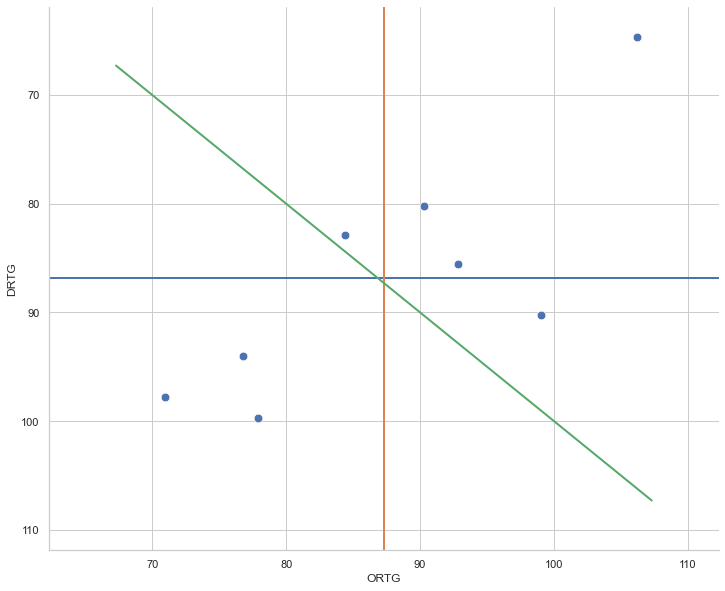

In [75]:
#basketball = sns.load_dataset("df_sorted")
sns.set(rc={'figure.figsize':(12,10)})
#bar_plot_nrtg = sns.barplot(y=df_sorted.index,x=df_sorted["NRTG"],color="#91baff")
#fig = bar_plot_nrtg.get_figure()
#fig.savefig("out.png")
sns.set_style("whitegrid")
scatterplot = sns.scatterplot(x=df_sorted["ORTG"],y=df_sorted["DRTG"],s=75)
sns.despine()
plt.plot([avgORTG-25,avgORTG+25], [avgDRTG,avgDRTG], linewidth=2)
plt.plot([avgORTG,avgORTG], [avgDRTG-25,avgDRTG+25], linewidth=2)
#plt.plot([avgORTG-25,avgORTG+25], [avgDRTG-25,avgDRTG+25], linewidth=2)
plt.plot([avgORTG-20,avgORTG+20], [avgORTG-20,avgORTG+20], linewidth=2)
#plt.plot([avgORTG-15,avgORTG+25], [avgORTG-25,avgORTG+15], linewidth=2)
#plt.plot([avgORTG-25,avgORTG+15], [avgORTG-15,avgORTG+25], linewidth=2)
plt.xlim(avgORTG-25,avgORTG+25)
plt.ylim(avgDRTG-25,avgDRTG+25)
scatterplot.invert_yaxis()
fig1 = scatterplot.get_figure()
fig1.savefig("scatternew_fornumbers.pdf")

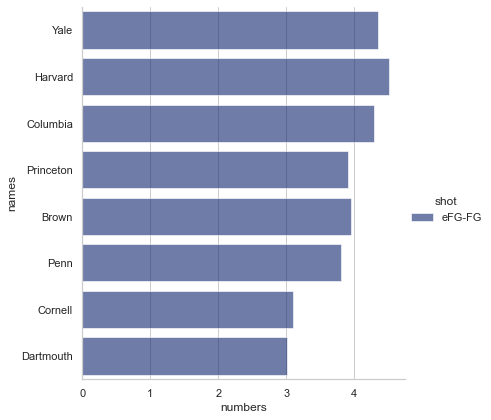

In [34]:
arr_numbers =[]
arr_names = []
arr_shot =[]
names = ['Yale','Harvard','Columbia','Princeton','Brown','Penn','Cornell','Dartmouth']
for x in range(0,8):
    arr_numbers.append(df_sorted.iloc[x,31]*(df_sorted.iloc[x,23]/df_sorted.iloc[x,0]))
    #arr_numbers.append(df_sorted.iloc[x,28])
for y in range(0,8):
    arr_names.append(names[y])
    #arr_names.append(names[y])
for z in range(0,8):
    arr_shot.append("eFG-FG")
    #arr_shot.append("FG%")
df_bar = pd.DataFrame({'numbers':arr_numbers,'names':arr_names,'shot':arr_shot})
g = sns.catplot(
    data = df_bar, kind="bar",
    x="numbers", y="names", hue="shot",
    ci="sd", palette="dark", alpha=.6, height=6
)
g

# SCRIPT DRAFT

In [210]:
oOREB=pd.DataFrame(data={'oOREB': [0,0,0,0,0,0,0,0]},index=['Yale','Princeton','Harvard','Columbia','Penn','Brown','Cornell','Dartmouth'])
oOREB

,oOREB
Yale,0
Princeton,0
Harvard,0
Columbia,0
Penn,0
Brown,0
Cornell,0
Dartmouth,0


In [211]:
# Import necessary packages
from bs4 import BeautifulSoup
import re
import codecs
f=codecs.open("boxscore.html", 'r')
soup = BeautifulSoup(f, "lxml")
#print(soup.prettify())# print the parsed data of html

In [212]:
box = soup.find_all("table", attrs={"class": "sidearm-table highlight-column-hover"})
print("Number of tables on site: ",len(gdp))

Number of tables on site:  2


In [213]:
table1=box[0]
oreb1 = table1.tfoot.tr.find("td",attrs={"data-label":"ORB-DRB"}).get_text()

In [214]:
table2=box[1]
oreb2 = table2.tfoot.tr.find("td",attrs={"data-label":"ORB-DRB"}).get_text()

In [215]:
gsdf = soup.find_all("h3", attrs={"class": "sub-heading"})
print("Number of tables on site: ",len(gsdf))

Number of tables on site:  2


In [216]:
total = re.compile("[^\s]+")
orbonly = re.compile(".+?(?=-)")
team1 = use.match(gsdf[0].text).group(0)
team1oreb = int(orbonly.match(oreb1).group(0))
team2 = use.match(gsdf[1].text).group(0)
team2oreb = int(orbonly.match(oreb2).group(0))
team1oreb
team2oreb

12

In [217]:
oOREB.at['Yale','oOREB']+=2

In [2]:
df = pd.concat([teamscoring,teamfg,team3pt,oppscoring,oppfg,opp3pt,teamft,oppft,teamreb,oppreb,teamoreb,teamdreb,toratio,tomargin,oOREB],axis=1)

NameError: name 'pd' is not defined